SEASONAL ARIMA(SARIMA): ARIMA models with a seasonal component is called SARIMA                             
ORDERS OF SARIMA:                         
p,d,q (Orders of trend component)                    
P,D,Q,m (Orders of seasonal component)                
p: Order of Auto Regression (Denotes the number of past values to consider)               
d: Order of differencing (To make data stationary)                  
q:  Order of Moving Average (Denotes the number of past values to consider)


P: Order of Auto Regression of De-seasonal time series (Denotes the number of past values to consider)               
D: Order of differencing to make time series de-seasonal(To make data stationary)                  
Q:  Order of Moving Average of De-seasonal time series(Denotes the number of past values to consider)
m: Period of Seasonality

Step 1: Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [3]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [4]:
df["Date"] = pd.to_datetime({"day": 1, "month": df["month"], "year": df["year"]})

In [5]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   Date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


Plotting the data

In [8]:
df.set_index("Date", inplace = True)

In [9]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [11]:
df.tail()

,year,month,decimal_date,average,interpolated
Date,,,,,
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51
2018-10-01,2018,10,2018.792,406.00,406.00
2018-11-01,2018,11,2018.875,408.02,408.02


<AxesSubplot:xlabel='Date'>

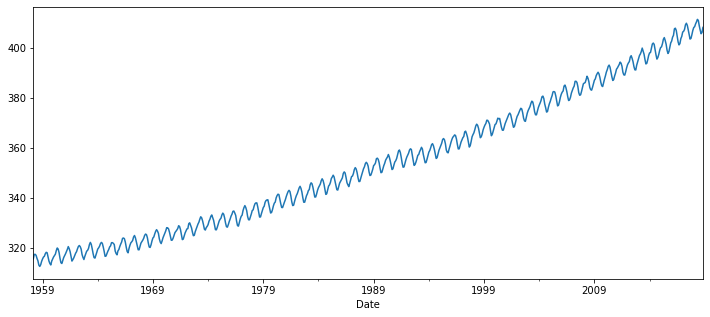

In [10]:
df["interpolated"].plot(figsize= (12, 5))

Step 2: ETS Decomposition

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
result = seasonal_decompose(df["interpolated"])

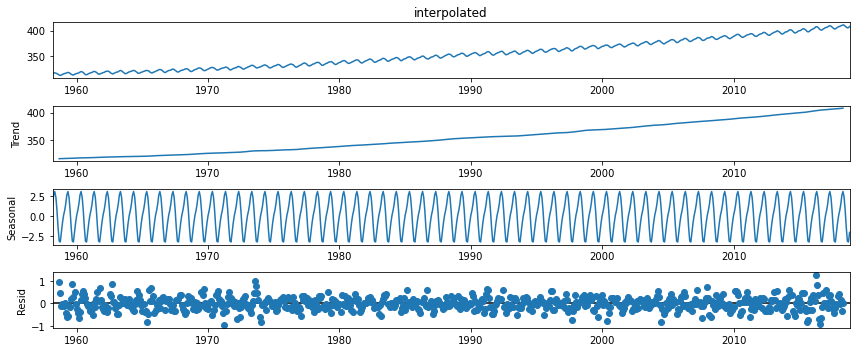

In [17]:
plt.rcParams["figure.figsize"] = (12,5)
result.plot();

<AxesSubplot:xlabel='Date'>

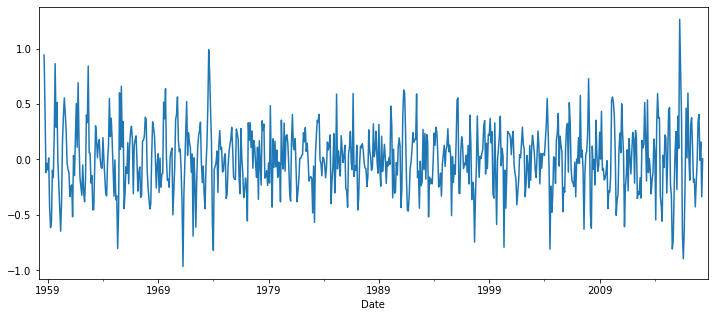

In [18]:
result.resid.plot()

Step3: Adfuller test to confirm non-stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adf_result = adfuller(df["interpolated"], autolag= "t-stat")

In [22]:
adf_result

(4.994847244403932,
 1.0,
 20,
 708,
 {'1%': -3.439620010600208,
  '5%': -2.8656309041017756,
  '10%': -2.5689484851894413},
 2.817104371079612)

p-value > 0.05, Null hypothesis is accepted, data is non-stationary

Step 4: Splitting the data into train and test

In [23]:
df.shape

(729, 5)

In [24]:
train = df.iloc[:717]

In [25]:
test = df.iloc[717:]

Step 5: Deciding the order using auto_arima

In [26]:
from pmdarima import auto_arima

In [27]:
auto_arima(df["interpolated"], seasonal= True, m = 12)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Step 6: Fitting the ARIMA model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model = SARIMAX(train["interpolated"], order= (0,1,3), seasonal_order = (1, 0, 1, 12))

In [33]:
results = model.fit()

Step 7: Forecasting for test value

In [34]:
start = len(train)
end = len(train) + len(test) - 1

In [36]:
predictions = results.predict(start= start, end= end, typ= "level", dynamic= False).rename("SARIMA(0, 1, 3)(1, 0, 1, 12)")

Step 8: Plotting the test value vs predicted value

Text(0.5, 1.0, 'Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii')

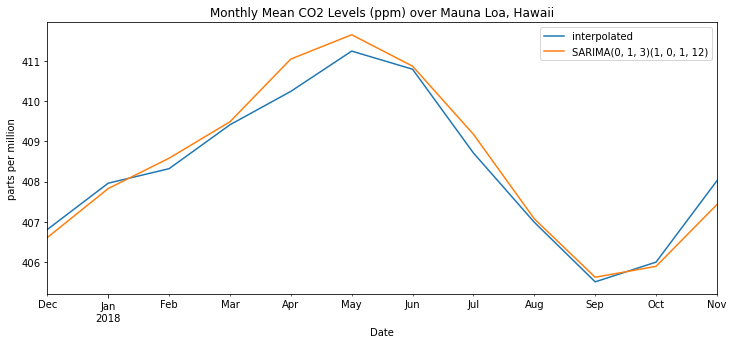

In [38]:
test["interpolated"].plot(figsize = (12, 5), legend = True)
predictions.plot(legend = True)
plt.ylabel("parts per million")
plt.title("Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii")

Step 9: Evaluate the model

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [40]:
metrics = [mean_absolute_error, mean_squared_error, rmse]

In [45]:
for metric in metrics:
    error = metric(test["interpolated"], predictions)
    print("SARIMA (0, 1, 3)(1, 0, 1, 12) {}: {}".format(str(metric).split(" ")[1], error))

SARIMA (0, 1, 3)(1, 0, 1, 12) mean_absolute_error: 0.27589893795436166
SARIMA (0, 1, 3)(1, 0, 1, 12) mean_squared_error: 0.12845846185650298
SARIMA (0, 1, 3)(1, 0, 1, 12) rmse: 0.35841102362581284


Step 10: Retrain the entire model and predict future

In [46]:
model = SARIMAX(df["interpolated"], order= (0,1,3), seasonal_order = (1, 0, 1, 12) )

In [47]:
fitted_model = model.fit()

In [49]:
predictions = fitted_model.predict(start = len(df), end = len(df) + 12, typ = "level", dynamic = False)

Text(0.5, 1.0, 'Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii')

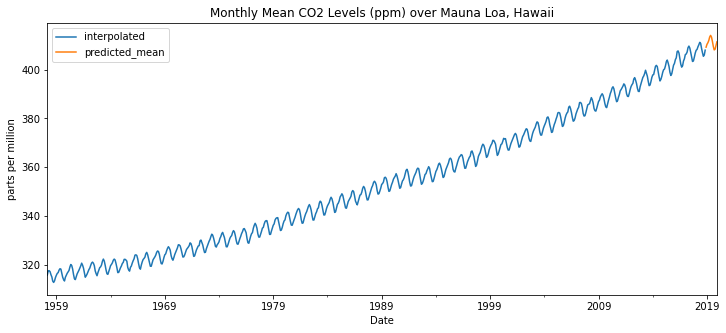

In [50]:
df["interpolated"].plot(figsize = (12, 5), legend = True)
predictions.plot(legend = True)
plt.ylabel("parts per million")
plt.title("Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii")